<a href="https://colab.research.google.com/github/peisuke/ml-works/blob/main/6/6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ニューラルネットワークを利用した分類
- 目的
    - ニューラルネットワークを利用してシミュレーションデータの分類を実施
- 内容
    - ニューラルネットワークでの分類
    - 既存の手法との比較
        - SVMを用いた分類
        - ナイーブベイズを用いた分類
        - Gradient Boostingを用いた分類
- 参考
    - 本コードは以下のサイトを参考にしました
    - http://taustation.com/mlp-multilayer-perceptron/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [2]:
xmin, xmax = -1.5, 2.5
ymin, ymax = -0.75, 1.75
 
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, stratify=y, random_state=42)

In [3]:
f0 = np.linspace(xmin, xmax, 400)
f1 = np.linspace(ymin, ymax, 400)
f0, f1 = np.meshgrid(f0, f1)

In [4]:
def plot_all(pred):
    fig, ax = plt.subplots()
    color0, color1 = 'tab:blue', 'tab:orange'
    Xtr0 = X_train[y_train==0]
    Xtr1 = X_train[y_train==1]
    ax.scatter(Xtr0[:, 0], Xtr0[:, 1], marker='o', s=80, color=color0)
    ax.scatter(Xtr1[:, 0], Xtr1[:, 1], marker='^', s=80, color=color1)
    ax.contourf(f0, f1, pred, levels=1, colors=[color0, color1], alpha=0.25)
    ax.contour(f0, f1, pred, levels=[0.5])
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    plt.show()

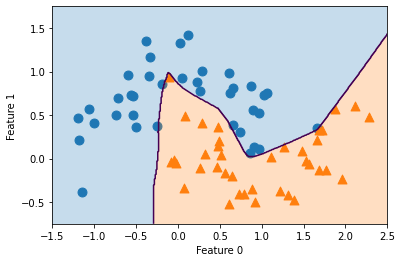

In [5]:
# ニューラルネットワークを用いた分類
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
pred = mlp.predict(np.vstack([f0.ravel(), f1.ravel()]).T).reshape(f0.shape)
plot_all(pred)

In [6]:
# SVMを用いた分類
clf = svm.SVC().fit(X_train, y_train)
pred = clf.predict(np.vstack([f0.ravel(), f1.ravel()]).T).reshape(f0.shape)

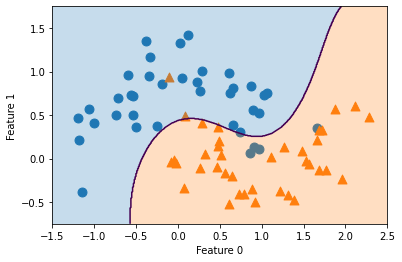

In [7]:
plot_all(pred)

In [8]:
# ナイーブベイズを用いた実験
clf = GaussianNB().fit(X_train, y_train)
pred = clf.predict(np.vstack([f0.ravel(), f1.ravel()]).T).reshape(f0.shape)

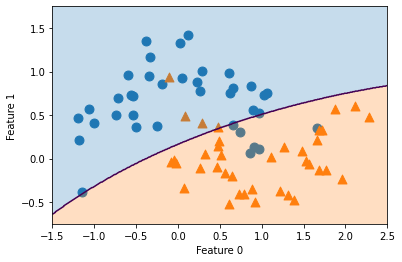

In [9]:
plot_all(pred)

In [10]:
# 勾配Boostingを用いた実験
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=1, random_state=0).fit(X_train, y_train)
pred = clf.predict(np.vstack([f0.ravel(), f1.ravel()]).T).reshape(f0.shape)

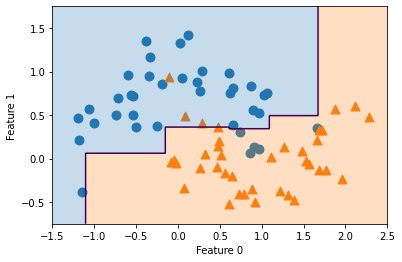

In [11]:
plot_all(pred)